In [1]:
library(tidyverse)
library(MASS)
library(ggExtra)

── Attaching core tidyverse packages ────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




ERROR: Error in library(ggExtra): there is no package called ‘ggExtra’


In [46]:
N_T <- 200
T_vec <- seq(-1,1,length.out = N_T)

boltz <- function(B0,E){
    exp(B0) * exp(-E * seq(-1,1,length.out = N_T))
}

T_to_C <- function(T,Tref){
    (1 / (8.617e-5*T + (1 / (Tref+273.15)))) - 273.15
}

Saving 7 x 7 in image



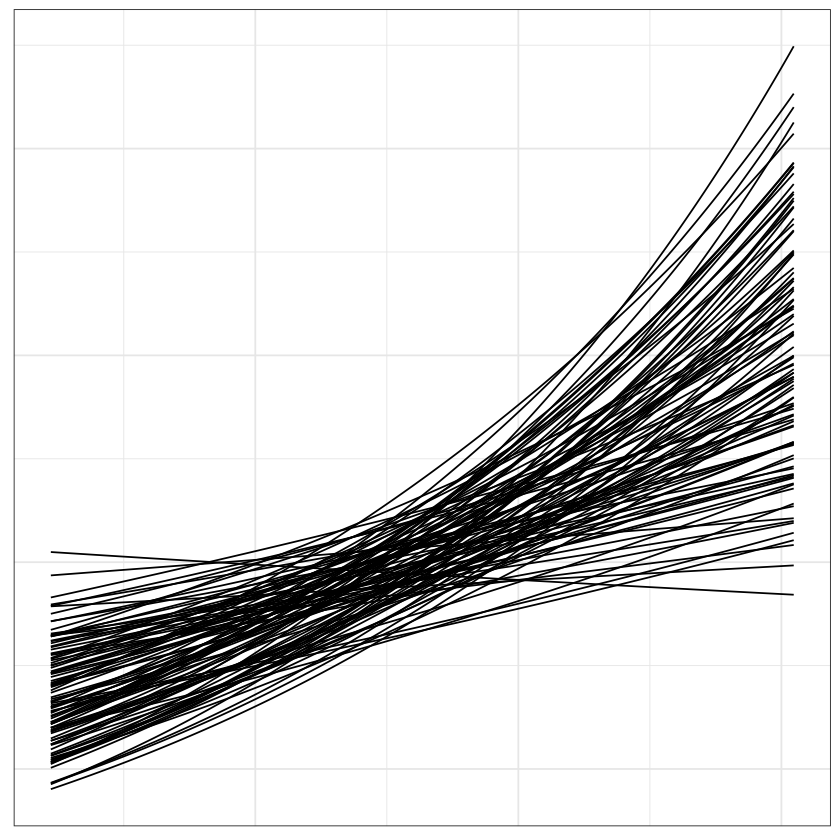

In [47]:
set.seed(3)

N = 100

means <- c(0.0,0.4)
covar <- matrix(c(0.005,-0.0,-0.0,0.04), ncol = 2)

TPC_params <- MASS::mvrnorm(N,means,covar)


# B0 <- rlnorm(N,sdlog = 0.1)
# E <- rnorm(N,0.65,0.2)

result <- matrix(0,N,N_T)
colnames(result) <- paste(T_vec)
for(i in 1:N){
    result[i,] <- boltz(TPC_params[i,1],TPC_params[i,2])
}

result <- result %>%
    as_tibble() %>%
    mutate(rep = 1:N) %>%
    pivot_longer(-rep,names_to = "T", values_to = "rate") %>%
    mutate(T = as.numeric(T))

p <- result %>%
    ggplot(aes(x=T_to_C(T,13.0),y=(rate),group = rep))+
        geom_line()+
        theme_bw()+
        theme(strip.text = element_blank(),text = element_blank(),axis.ticks = element_blank())


ggsave("../docs/Figures/boltzmann_ensemble.pdf", p)

p

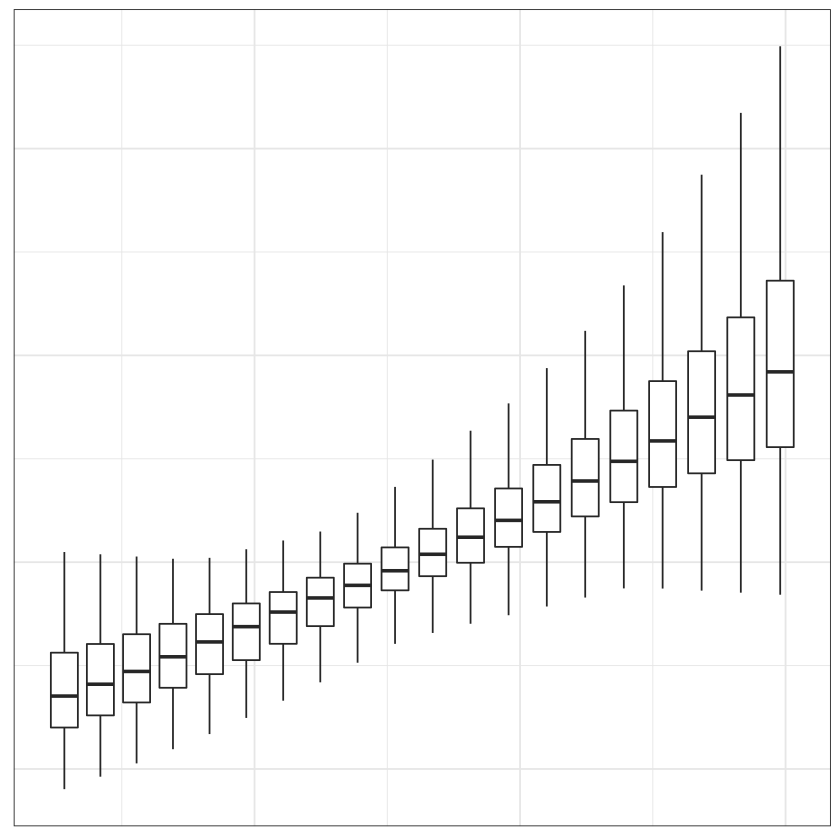

In [50]:
p <- result %>%
    mutate(bin = cut(T, breaks =  20)) %>%
    group_by(bin) %>%
    mutate(T_avg = mean(T_to_C(T,13.0))) %>%
    ggplot(aes(x=T_avg,y=rate, group = T_avg))+
        geom_boxplot(outlier.alpha = 0.0)+
        theme_bw()+
        theme(strip.text = element_blank(),text = element_blank(),axis.ticks = element_blank())

p
ggsave("../docs/Figures/boltzmann_t_dist.pdf", p, width = 4, height = 4)


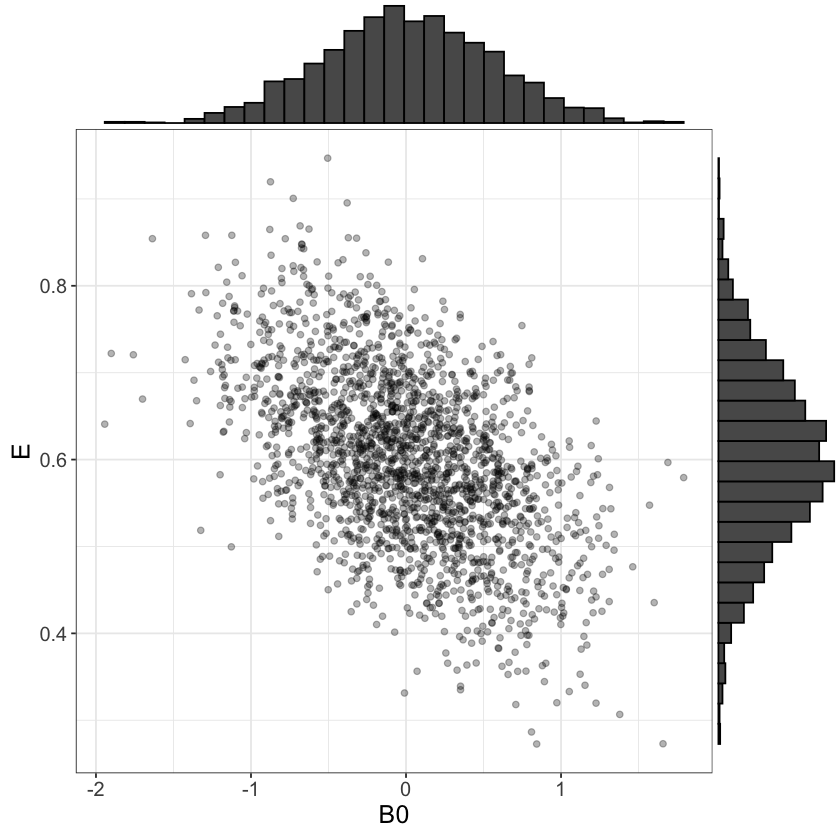

In [49]:
means <- c(0.0,0.6)
covar <- matrix(c(0.3,-0.03,-0.03,0.01), ncol = 2)

TPC_params <- MASS::mvrnorm(2000,means,covar)

p <- TPC_params %>%
    as_tibble %>%
    rename(B0 = V1, E = V2) %>%
    ggplot(aes(x=B0, y = E))+
        geom_point(alpha = 0.3)+
        theme_bw()+
        theme(text = element_text(size = 15))
    
p <- ggMarginal(p, type="histogram")

p

In [33]:
ggsave("../docs/Figures/boltzmann_distribution.pdf", p,width = 4,height = 4)

In [34]:
means <- c(0.0,0.2)
covar <- matrix(c(0.005,-0.0,-0.0,0.02), ncol = 2)

TPC_params <- MASS::mvrnorm(N,means,covar)

result <- matrix(0,N,N_T)
colnames(result) <- paste(T_vec)
for(i in 1:N){
    result[i,] <- boltz(TPC_params[i,1],TPC_params[i,2])
}

result1 <- result %>%
    as_tibble() %>%
    mutate(rep = 1:N) %>%
    pivot_longer(-rep,names_to = "T", values_to = "rate") %>%
    mutate(T = as.numeric(T), var = "Control")

In [35]:
means <- c(0.0,0.6)
covar <- matrix(c(0.005,-0.0,-0.0,0.02), ncol = 2)

TPC_params <- MASS::mvrnorm(N,means,covar)

result <- matrix(0,N,N_T)
colnames(result) <- paste(T_vec)
for(i in 1:N){
    result[i,] <- boltz(TPC_params[i,1],TPC_params[i,2])
}

result2 <- result %>%
    as_tibble() %>%
    mutate(rep = 1:N) %>%
    pivot_longer(-rep,names_to = "T", values_to = "rate") %>%
    mutate(T = as.numeric(T), var = "Mean")

In [36]:
means <- c(0.0,0.2)
covar <- matrix(c(0.005,-0.0,-0.0,0.1), ncol = 2)

TPC_params <- MASS::mvrnorm(N,means,covar)

result <- matrix(0,N,N_T)
colnames(result) <- paste(T_vec)
for(i in 1:N){
    result[i,] <- boltz(TPC_params[i,1],TPC_params[i,2])
}

result3 <- result %>%
    as_tibble() %>%
    mutate(rep = 1:N) %>%
    pivot_longer(-rep,names_to = "T", values_to = "rate") %>%
    mutate(T = as.numeric(T), var = "var")

In [37]:
means <- c(0.0,0.2)
covar <- matrix(c(0.005,-0.01,-0.01,0.02), ncol = 2)

TPC_params <- MASS::mvrnorm(N,means,covar)

result <- matrix(0,N,N_T)
colnames(result) <- paste(T_vec)
for(i in 1:N){
    result[i,] <- boltz(TPC_params[i,1],TPC_params[i,2])
}

result4 <- result %>%
    as_tibble() %>%
    mutate(rep = 1:N) %>%
    pivot_longer(-rep,names_to = "T", values_to = "rate") %>%
    mutate(T = as.numeric(T), var = "cov")

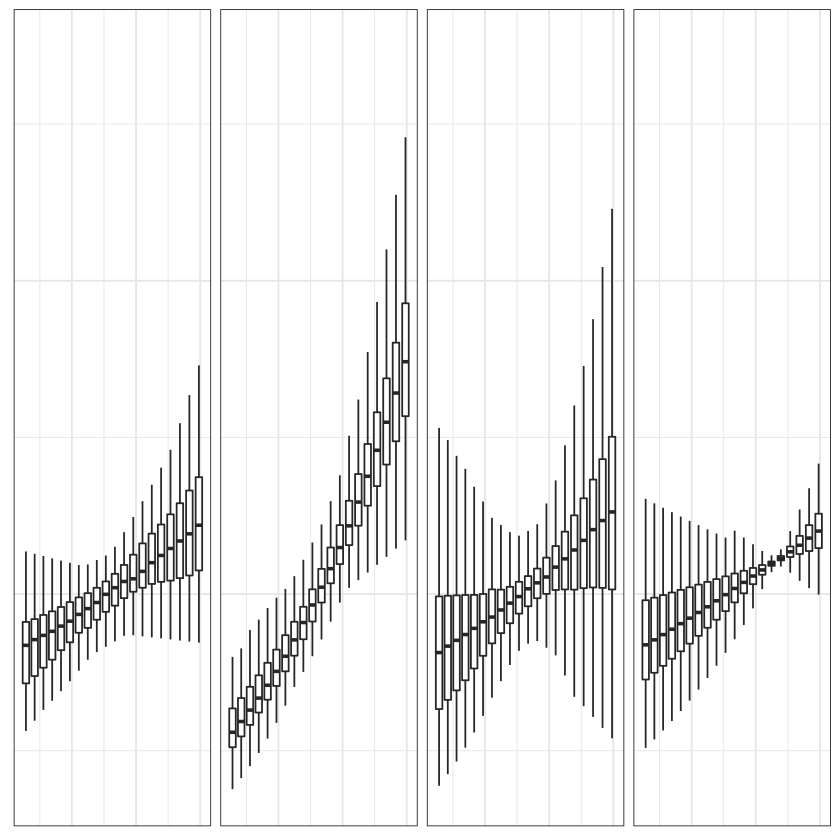

In [43]:
quantiles <- function(x){
    x <- na.omit(x)
    q = quantile(x, probs = c(0.05,0.95))
    mean = mean(x)
    vctrs::new_data_frame(list(y = mean, ymin = q[1], ymax = q[2]))
}

p <- rbind(result1,result2,result3,result4) %>%
    mutate(var = factor(var,levels = c("Control","Mean","var","cov"))) %>%
    mutate(bin = cut(T, breaks =  20)) %>%
    group_by(bin) %>%
    mutate(T_avg = mean(T_to_C(T,13.0))) %>%
    ggplot(aes(x=T_avg,y=rate, group = T_avg))+
        geom_boxplot(outlier.alpha = 0.0)+
        theme_bw()+
        facet_wrap(~var, nrow =  1)+
        theme(strip.text = element_blank(),text = element_blank(),axis.ticks = element_blank())

p

ggsave("../docs/Figures/boltzmann_t_params.pdf", p, width = 9, height = 2.5)
# 

In [61]:
x = rlnorm(1000000, meanlog = 1, sdlog = 0.1)
y = rlnorm(1000000, meanlog = 1, sdlog = 0.1)



In [62]:
mean(x) * mean(1/y)

[1] 1.010095

In [63]:
mean(x/y)

[1] 1.010117

In [67]:
mean(1)

[1] 1